In [1]:
import cv2
import os
import numpy as np
import string
import random
import shutil

from predict_image import predict

Segmentation Models: using `keras` framework.


# MPF Computation
This notebook contains the melt pond fraction computations. It consists of two parts:
- 1) MPF classified images: Here, we select 50 random VIS images, classify them with the OSSP algorithm and compare the MPF to corresponding TIR images, which are classified by our final model.
- 2) MPF training data: Here, we compare the MPF from classified VIS to corresponding annotated TIR.

You need the following data:
- vis_dir = 'unet_melt_pond_detection/mpf_data/vis'
- ir_class_dir = 'unet_melt_pond_detection/mpf_data/ir_classified'
- ir_dir = 'unet_melt_pond_detection/mpf_data/ir'
- ir_dir_processed = 'unet_melt_pond_detection/mpf_data/ir_processed'
- vis_crop_dir = 'unet_melt_pond_detection/mpf_data/vis_train_cropped'
- vis_class_dir = 'unet_melt_pond_detection/mpf_data/vis/classified'
- vis_crop_dir = 'unet_melt_pond_detection/mpf_data/vis_train_cropped/classified'

### 1) MPF classified images
Calculate MPF for 50 randomly selected classified VIS and corresponding TIR to estimate the performance of our model.

##### Preparation: select random VIS images and corresponding TIR images (this can not be reproduced because not all VIS images are provided in this work)

In [2]:
def select_random_files(folder_path, num_files=10, destination_folder=''):
    all_files = os.listdir(folder_path)
    random_files = random.sample(all_files, min(num_files, len(all_files)))
    
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    
    for file_name in random_files:
        source_file = os.path.join(folder_path, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        shutil.copy2(source_file, destination_file)
    
    return random_files

In [3]:
imgs = select_random_files('E:/polar/code/data/vis/entire_raw/', num_files=50, destination_folder='E:/polar/code/data/evaluation/mpf/vis')

In [4]:
vis_dir = 'E:/polar/code/data/evaluation/mpf/vis'

timestamps = []

for f in os.listdir(vis_dir):
    name = f
    first_underscore_index = f.index('_')
    second_underscore_index = f.index('_', first_underscore_index + 1)
    stamp = f[first_underscore_index + 1:second_underscore_index]
    
    timestamps.append(stamp)

In [ ]:
def extract_number_from_string(string):
    last_underscore_index = string.rfind('_')
    number = string[last_underscore_index + 1:]
    return number

In [6]:
print(timestamps)

['143510', '143718', '143734', '143902', '144238', '144446', '144454', '144550', '144702', '145030', '145038', '145110', '145150', '145310', '145350', '145542', '145630', '145950', '150030', '150038', '150126', '150150', '150454', '150726', '150926', '151342', '151622', '152150', '152750', '153038', '153230', '153406', '153414', '153502', '153814', '154142', '154158', '154406', '154814', '154830', '154854', '155014', '155022', '155246', '155342', '155414', '155534', '155622', '155646', '155726']


In [ ]:
def check_files(folder_path, string, destination_folder):
    files_with_number = []
    
    for file_name in os.listdir(folder_path):
        if string in file_name:
            source_file = os.path.join(folder_path, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            shutil.copy2(source_file, destination_file)

In [ ]:
for t in timestamps:
    check_files('E:/polar/Flight9/ir_all/', t, 'E:/polar/code/data/evaluation/mpf/ir')

### Classify VIS images using the OSSP algorithm
terminal command: (ossp) PS E:\polar\code\ponds\ponds\vis_segmentation\OSSP-wright> python ossp_process.py 'E:/polar/code/data/evaluation/mpf/vis/' 'srgb' 'E:/polar/code/ponds/ponds/vis_segmentation/OSSP-wright/training_datasets/icebridge_v5_training_data.h5' -v

- replace the path where OSSP-wright folder is located and where vis images are located ('unet_melt_pond_detection/mpf_data/vis')

### Calculate MPF in VIS

In [3]:
import os
import cv2
import numpy as np
# calculation of MPF

vis_class_dir = 'E:/polar/code/data/evaluation/mpf/vis/classified/'
num_imgs = 0
mpf_coll = 0

for f in os.listdir(vis_class_dir):
    if f.endswith('.tif'):
        num_imgs += 1
        im = cv2.imread(os.path.join(vis_class_dir, f),0)
        # use the class values specified by OSSP
        white_ice = np.sum(im==1)
        gray_ice = np.sum(im==2)
        pond = np.sum(im==3)
        mpf = pond / ( white_ice + gray_ice + pond )
        mpf_coll += mpf

mpf_vis = mpf_coll / num_imgs

In [4]:
print(mpf_vis)

0.1754387513312522


### Classify TIR images with our final model

In [6]:
import os
import cv2
import numpy as np
# calculation of MPF

ir_class_dir = 'E:/polar/code/data/evaluation/mpf/ir_classified/'
ir_dir = 'E:/polar/code/data/evaluation/mpf/ir/'
ir_dir_processed = 'E:/polar/code/data/evaluation/mpf/ir_processed/'

weights500 ='./model_weights/best_modelfinal_runsharpen500.h5'

In [6]:
for f in os.listdir(ir_dir_processed):
    name = f
    last_underscore_index = f.rfind('_')
    last_period_index = f.rfind('.')
    image_number = f[last_underscore_index + 1:last_period_index]

16
144
160
248
464
592
600
656
728
936
944
976
1016
1096
1136
1248
1296
1496
1536
1544
1592
1616
1800
1952
2072
2328
2488
2816
3176
3344
3456
3552
3560
3608
3800
4008
4024
4152
4400
4416
4440
4520
4528
4672
4728
4760
4840
4888
4912
4952


1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 3s 3s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished proce

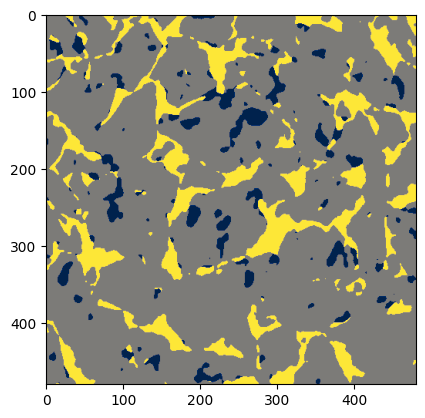

In [4]:
for idx, file in enumerate(os.listdir(ir_dir)):
    img = cv2.imread(os.path.join(ir_dir, file), 0)
    predict(img, 480, weights500, backbone='resnet34', train_transfer='imagenet', save_path=os.path.join(ir_class_dir,'{}.png'.format(idx)), visualize=False)

### Calculate MPF for classified TIR

In [7]:
num_imgs = 0
mpf_coll = 0

for f in os.listdir(ir_class_dir):
    num_imgs += 1
    im = cv2.imread(os.path.join(ir_class_dir, f),0)
    pond = np.sum(im==0)
    sea_ice = np.sum(im==1)
    ocean = np.sum(im==2)
    mpf = pond / ( sea_ice + pond )
    mpf_coll += mpf

mpf_tir = mpf_coll / num_imgs

In [8]:
print(mpf_tir)

0.14508732650004683


### 2) MPF training data

Calculate MPF from annotated TIR data and corresponding VIS to estimate sensor differences in detecting melt ponds.

In [7]:
masks = np.load('./data/ds_np/480_ma.npy')
masks_test = np.load('./data/test_ds_np/480_ma.npy')

masks = np.concatenate((masks, masks_test), axis=0)

num_imgs = 0
mpf_coll = 0

for im in masks:
    num_imgs += 1
    print(np.unique(im))
    #mask = im[im==0]
    pond = np.sum(im==0)
    sea_ice = np.sum(im==1)
    ocean = np.sum(im==2)
    mpf = pond / ( sea_ice + pond )
    mpf_coll += mpf
    print(mpf_coll)

mpf_tir_train = mpf_coll / num_imgs


[0 1 2]
0.1812106244644927
[0 1 2]
0.25999663717345534
[0 1 2]
0.47383151708889304
[0 1 2]
0.5827713856644232
[0 1 2]
0.7375683150885212
[0 1 2]
1.0327920260272545
[0 1 2]
1.1015962512821276
[0 1 2]
1.1498368837480397
[0 1 2]
1.2237072700492972
[0 1 2]
1.445062789946968


In [6]:
print(mpf_tir_train)

0.14450627899469679


In [28]:
import matplotlib.pyplot as plt
import shutil

# get the corresponding VIS images for the same seconds
seconds = [151510, 151434, 151518, 151602, 151610, 152002, 153634, 153938]

all_vis = 'E:/polar/code/data/vis/entire_raw/'
sel_dir = 'E:/polar/code/data/evaluation/mpf/vis_train/'
vis_sel = []


for sec in seconds:
   for f in os.listdir(all_vis):
      if str(sec) in f:
         shutil.copy(os.path.join(all_vis, f), sel_dir)
         im = cv2.imread(os.path.join(all_vis, f))
         vis_sel.append(im)


151510
151434
151518
151602
151610
152002
153634
153938


### Classify corresponding VIS using OSSP 
Terminal command: (ossp) PS E:\polar\code\ponds\ponds\vis_segmentation\OSSP-wright> python ossp_process.py 'E:/polar/code/data/evaluation/mpf/vis_train_cropped/' 'srgb' 'E:/polar/code/ponds/ponds/vis_segmentation/OSSP-wright/training_datasets/icebridge_v5_training_data.h5' -v

- replace the path where OSSP-wright folder is located and where vis images are located ('unet_melt_pond_detection/mpf_data/vis_train_cropped')

In [2]:
# contains the maunally cropped images
vis_crop_dir = 'E:/polar/code/data/evaluation/mpf/vis_train_cropped/classified/'
num_imgs = 0
mpf_coll = 0

for f in os.listdir(vis_crop_dir):
    if f.endswith('.tif'):
        num_imgs += 1
        im = cv2.imread(os.path.join(vis_crop_dir, f),0)
        white_ice = np.sum(im==1)
        gray_ice = np.sum(im==2)
        pond = np.sum(im==3)
        mpf = ( pond / ( white_ice + gray_ice + pond) )
        mpf_coll += mpf
mpf_vis_train = mpf_coll / num_imgs

0.13130676667501365
0.2596393611908771
0.4826652956864231
0.7312515698553593
0.984973662641896
1.128374199464119
1.3610323236512185
1.6989793294796822
1.8681736570470813
1.9915788427494592


In [10]:
print(mpf_vis_train)

0.1991578842749459
